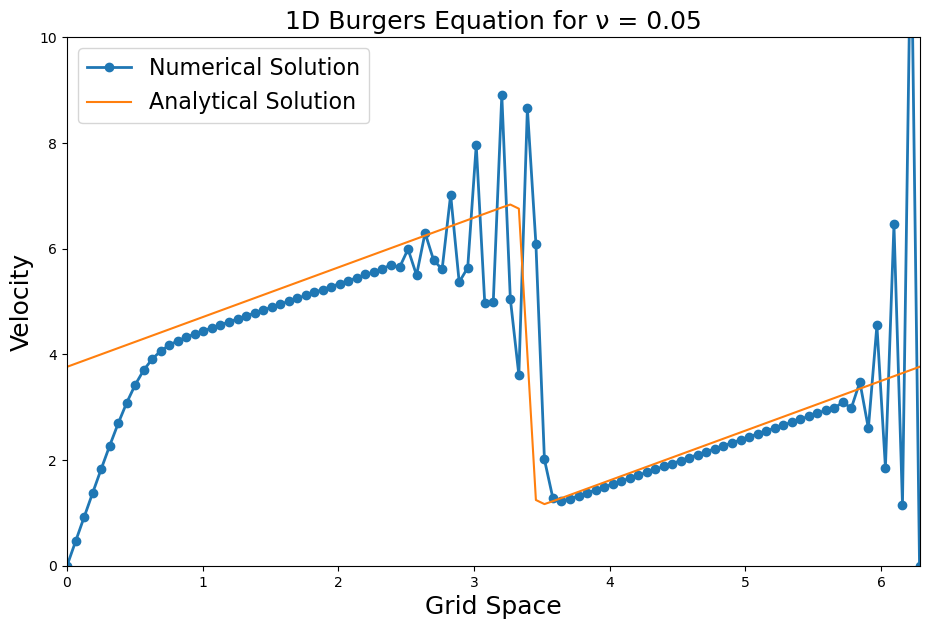

In [22]:
import numpy as np
import sympy as sp
from sympy.utilities.lambdify import lambdify
import matplotlib.pyplot as plt

# Define the symbolic variables
x, nu, t = sp.symbols('x nu t')

# Define the initial condition phi and its derivative phiprime
phi = (sp.exp(-(x - 4*t)**2/(4*nu*(t + 1))) + sp.exp(-(x - 4*t - 2*sp.pi)**2/(4*nu*(t+1))))
phiprime = phi.diff(x)

# Define the initial condition expression for u
u = -2*nu*(phiprime/phi) + 4

# Lambdify the initial condition expression for numerical computation
ufunc = lambdify((t, x, nu), u)

# Set up the grid
nx = 101
nt = 20
dx = 2 * np.pi / (nx - 1)
nu = 0.05
dt = dx * nu
x = np.linspace(0, 2 * np.pi, nx)

# Compute the initial condition using the lambdify-ed function
u_initial = np.asarray([ufunc(0, x0, nu) for x0 in x])

# Time stepping and numerical solution using Crank-Nicolson method
u = u_initial.copy()

for n in range(nt):
    un = u.copy()

    M = np.zeros((nx, nx))
    b = np.zeros(nx)

    for i in range(1, nx - 1):
        M[i, i - 1] = -0.25 * nu * dt / dx**2 - 0.5 * un[i] * dt / dx
        M[i, i] = 1 + 0.5 * nu * dt / dx**2
        M[i, i + 1] = -0.25 * nu * dt / dx**2 + 0.5 * un[i] * dt / dx

        b[i] = un[i] + 0.25 * nu * dt / dx**2 * (un[i + 1] - 2 * un[i] + un[i - 1]) - 0.5 * un[i] * dt / dx * (un[i + 1] - un[i - 1])

    # Apply periodic boundary conditions
    M[0, 0] = 1
    M[0, -1] = -1
    M[-1, 0] = 0
    M[-1, -1] = 1
    b[0] = 0
    b[-1] = 0

    # Solve the system of equations using numpy.linalg.solve
    u = np.linalg.solve(M, b)

# Compute the analytical solution for comparison
u_analytical = np.asarray([ufunc(nt * dt, xi, nu) for xi in x])

# Plot the initial, analytical, and numerical solutions
plt.figure(figsize=(11, 7), dpi=100)
plt.plot(x, u, marker='o', lw=2, label='Numerical Solution')
plt.plot(x, u_analytical, label='Analytical Solution')
# Use the Unicode character for the Greek letter "nu"
nu_letter = '\u03BD'

# Replace 'nu' with the Greek letter in the title
plt.title(f'1D Burgers Equation for {nu_letter} = {nu}', fontsize=18)

plt.xlabel('Grid Space', fontsize=18)
plt.ylabel('Velocity', fontsize=18)
plt.xlim([0, 2 * np.pi])
plt.ylim([0, 10])
plt.legend(fontsize=16)
plt.savefig("burg_bad.png")
plt.show()
